In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [77]:
train_data = pd.read_csv("application_train.csv")
test_data = pd.read_csv("application_test.csv")
description_data = pd.read_csv("HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
description_data.head(122)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [4]:
train_data.sample(5)
#всього 307k рядків

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
158442,283678,0,Cash loans,M,N,Y,0,135000.0,76500.0,6673.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
157533,282600,0,Cash loans,F,N,Y,0,135000.0,132444.0,8230.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
183880,313129,0,Cash loans,F,N,Y,1,234000.0,284400.0,22599.0,...,0,0,0,0,0.0,0.0,0.0,6.0,2.0,2.0
76917,189186,0,Cash loans,F,N,Y,0,162000.0,728460.0,44694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
117455,236196,0,Cash loans,F,N,N,0,206100.0,1494486.0,43695.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Types of Features

In [5]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [28]:
#хардкоджені колонки, які треба перетворити в категорії. в основному це флаги
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                        'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2',
                        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                        'FLAG_DOCUMENT_21']
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype('category')
    
train_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [7]:
#колонки, які не категорії
numerical_features = train_data.select_dtypes(include = ['int64', 'float64']).columns
numerical_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 

# Missing data

In [8]:
print(train_data.shape)
print(test_data.shape)

(307511, 122)
(48744, 121)


Як і було сказано в описі датасету, тестовий набір без колонки Target

In [9]:
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [78]:
#є рядки з відсутніми значеннями, тому подивимося у відсотках
train_percent_missed = (train_data.isnull().sum() / train_data.isnull().count() * 100).sort_values(ascending=False)
train_percent_missed

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [79]:
# те ж саме для тестового набору
test_percent_missed = (test_data.isnull().sum() / test_data.isnull().count() * 100).sort_values(ascending=False)
test_percent_missed

COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
COMMONAREA_MEDI                 68.716150
NONLIVINGAPARTMENTS_AVG         68.412523
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MODE           67.249302
LIVINGAPARTMENTS_MEDI           67.249302
FLOORSMIN_MEDI                  66.605121
FLOORSMIN_AVG                   66.605121
FLOORSMIN_MODE                  66.605121
OWN_CAR_AGE                     66.289184
YEARS_BUILD_AVG                 65.275726
YEARS_BUILD_MEDI                65.275726
YEARS_BUILD_MODE                65.275726
LANDAREA_MEDI                   57.964057
LANDAREA_AVG                    57.964057
LANDAREA_MODE                   57.964057
BASEMENTAREA_MEDI               56.706466
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
NONLIVINGAREA_AVG               53

In [12]:
# тестові дані без missing values
sorted_columns = train_percent_missed.index.tolist()
sorted_columns = [col for col in sorted_columns if train_data[col].notnull().all()]
train_data_sorted = train_data[sorted_columns]
train_data_sorted

,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0,0,Cash loans,M,N,0,1,0,0,0,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,0,0,Cash loans,F,N,0,1,0,0,0,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,0,0,Revolving loans,M,Y,0,0,0,0,0,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,0,0,Cash loans,F,N,0,1,0,0,0,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,0,1,Cash loans,M,N,0,0,0,0,0,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,Cash loans,M,N,0,0,0,0,0,...,-1982,-8456.0,-236,-9327,0.032561,With parents,Separated,Secondary / secondary special,Working,456251
307507,0,0,Cash loans,F,N,0,1,0,0,0,...,-4090,-4388.0,365243,-20775,0.025164,House / apartment,Widow,Secondary / secondary special,Pensioner,456252
307508,0,0,Cash loans,F,N,0,1,0,0,0,...,-5150,-6737.0,-7921,-14966,0.005002,House / apartment,Separated,Higher education,Working,456253
307509,0,0,Cash loans,F,N,0,1,0,0,0,...,-931,-2562.0,-4786,-11961,0.005313,House / apartment,Married,Secondary / secondary special,Commercial associate,456254


# Duplicates

In [13]:
train_data[train_data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Дуплікатів нема, пощастило

# Distributions

In [14]:
train_data.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,305011.0,307328.0,307355.0,307408.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,NaN,NaN,NaN,NaN,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,NaN,NaN,NaN,NaN,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


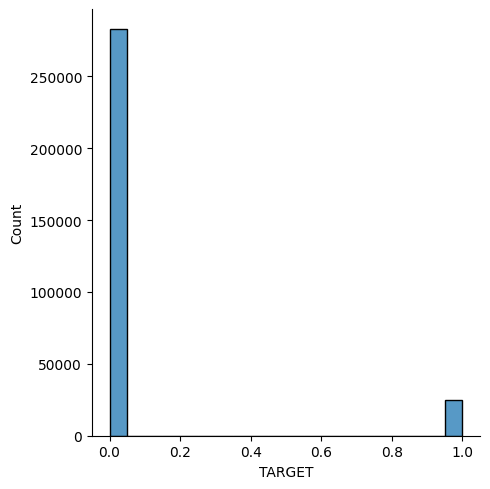

In [15]:
sns.displot(train_data["TARGET"], kde=False)

дані збалансовані погано

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>],
       [<Axes: title={'center':

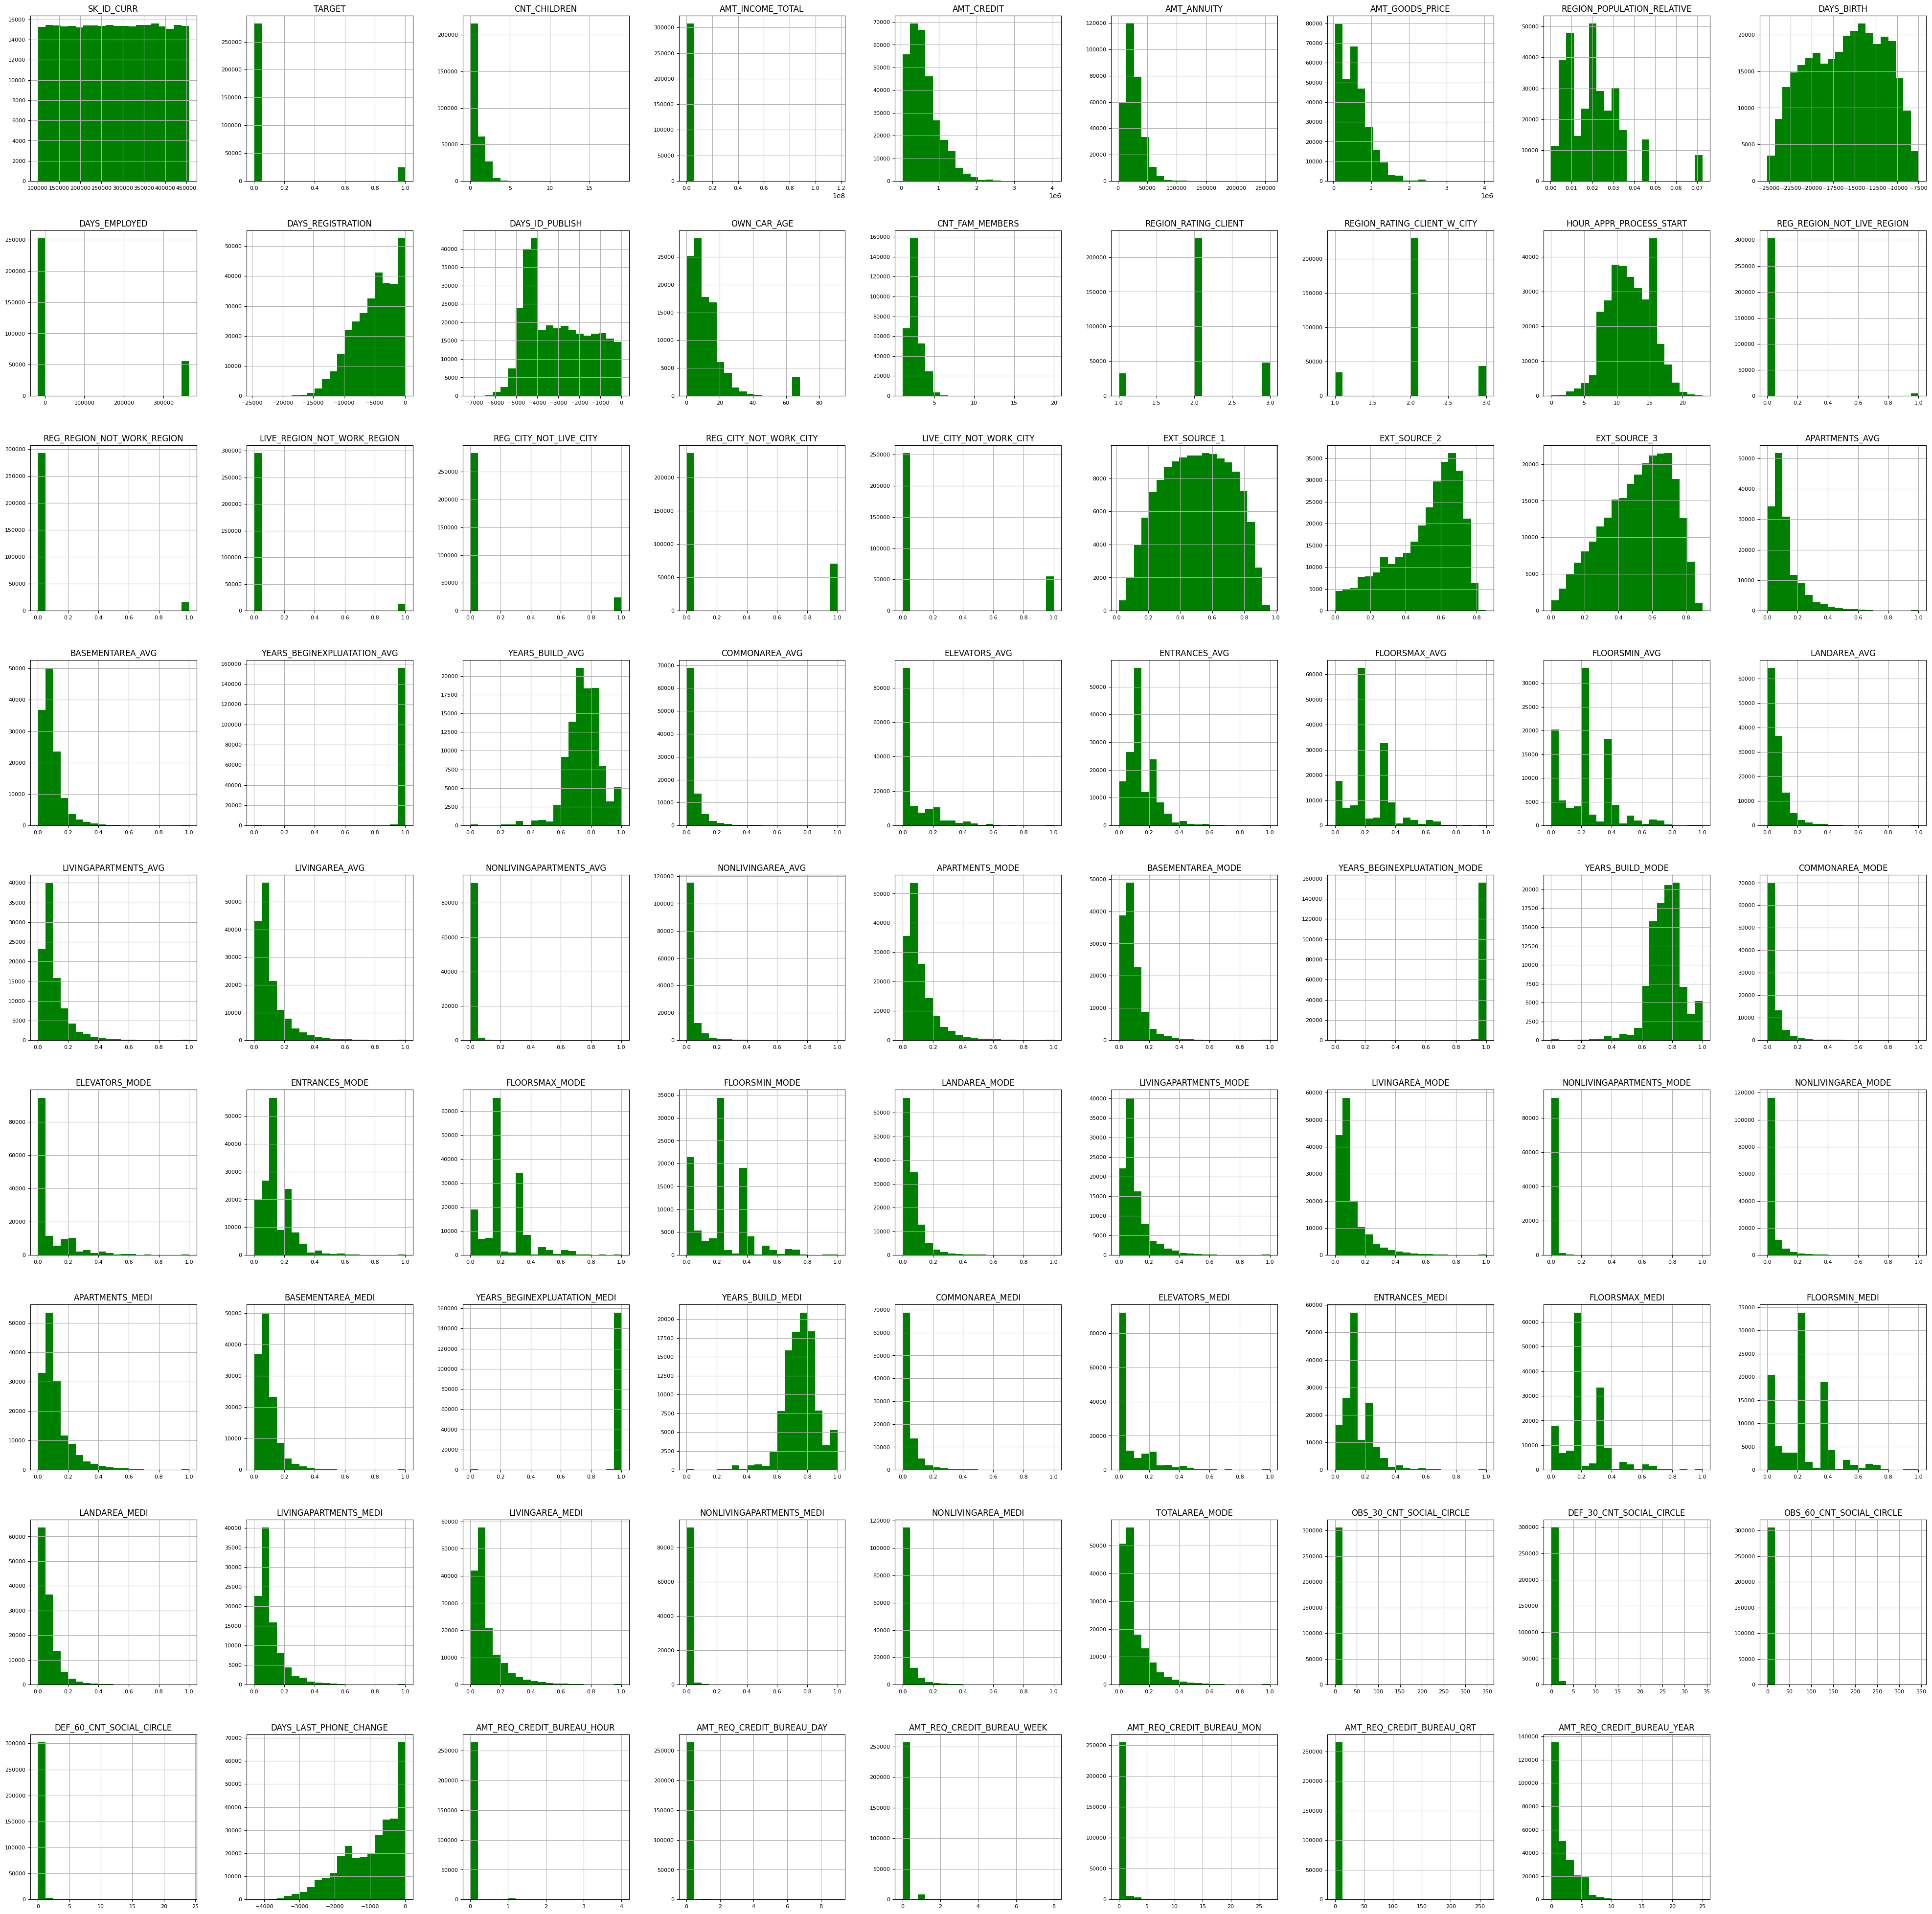

In [16]:
train_data[numerical_features].hist(figsize=(50, 50),color='g', bins=20, xlabelsize=8, ylabelsize=8)

Оберемо зараз фічі для моделі на основі цих гістограм

In [17]:
numerical_features = ["CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_REGISTRATION","OWN_CAR_AGE","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","YEARS_BUILD_AVG"]
categorical_features = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","FLAG_PHONE","FLAG_EMAIL"]

array([[<Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>],
       [<Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>]], dtype=object)

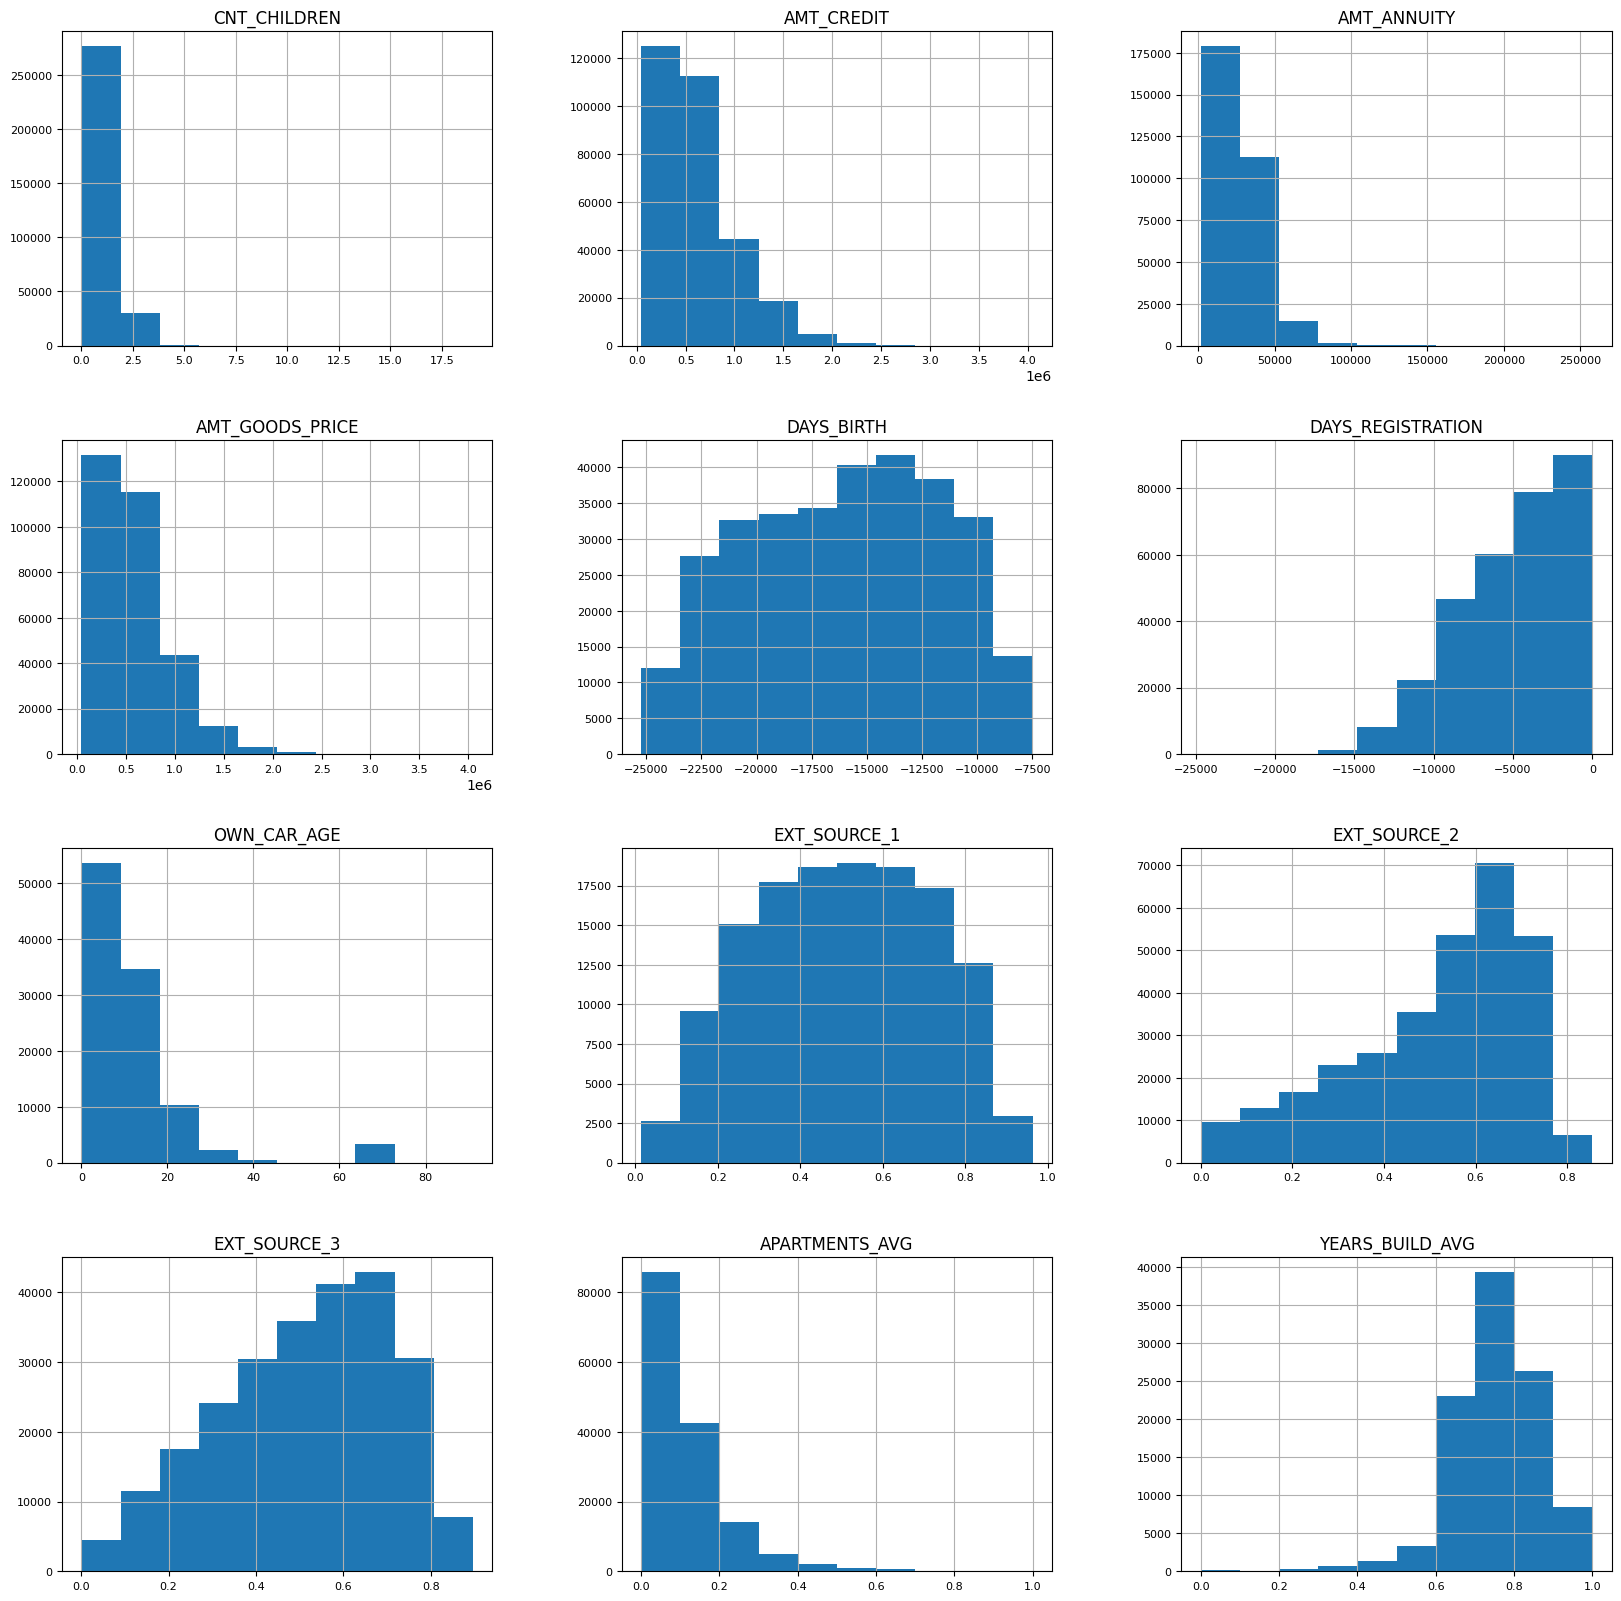

In [18]:
train_data[numerical_features].hist(figsize=(20,20), bins=10, xlabelsize=8, ylabelsize=8)

# Outliers

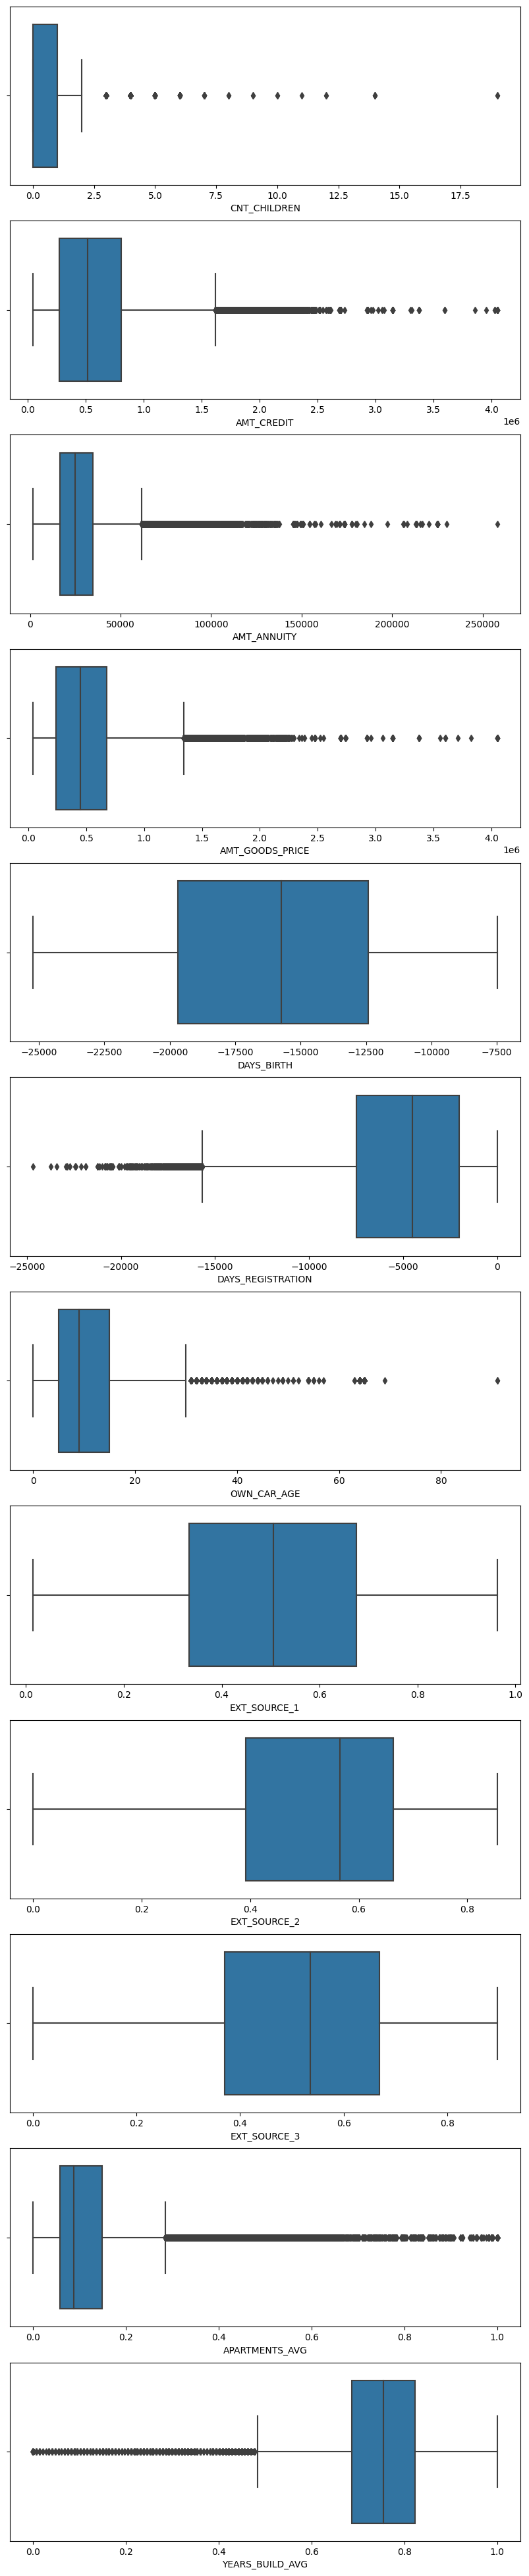

In [19]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,50)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=train_data[col], ax=axes[i])
plt.show()

# Linear relationship

скатерплот не виводиться, довго малюється і все :(

## Correlation matrix

<Axes: >

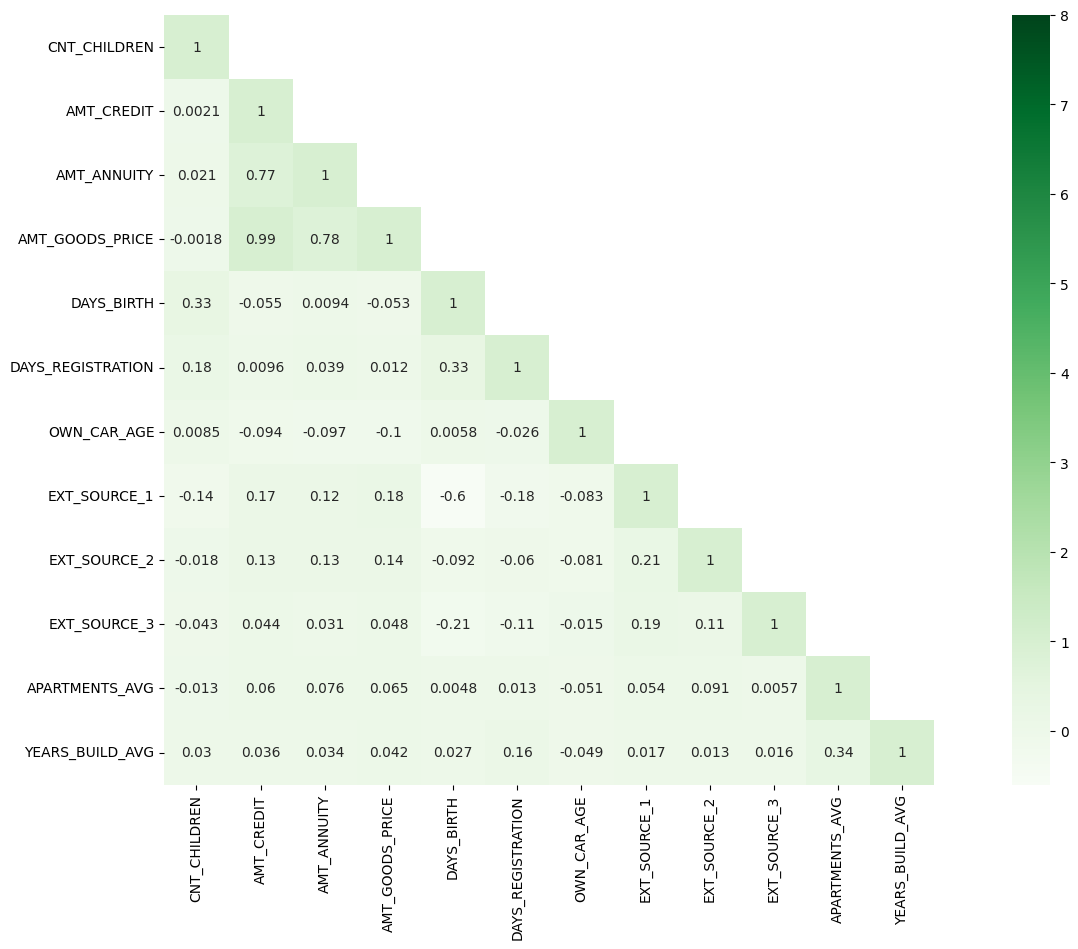

In [49]:
corrMatt = train_data[numerical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask, vmax=8, square=True, annot=True)
# я намагався додати categorical features до матриці, але здався

Можна прибрати AMT_GOODS_PRICE

In [51]:
numerical_features = ["CNT_CHILDREN","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH","DAYS_REGISTRATION","OWN_CAR_AGE","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","YEARS_BUILD_AVG"]
categorical_features = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","FLAG_PHONE","FLAG_EMAIL"]

# Final steps

In [61]:
sorted_columns_test = test_percent_missed.index.tolist()
sorted_columns_test = [col for col in sorted_columns_test if test_data[col].notnull().all()]
test_data_sorted = test_data[sorted_columns_test]
test_data_sorted

,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,AMT_INCOME_TOTAL,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_12,AMT_CREDIT,ORGANIZATION_TYPE,AMT_GOODS_PRICE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0,0,F,N,Y,0,-1740.0,0,1,0,0,0,0,0,0,0,0,135000.0,0,0,0,0,0,0,0,0,568800.0,Kindergarten,450000.0,0,Cash loans,0,0,0,0,0,18,TUESDAY,2,2,2.0,1,0,1,0,1,1,-812,-5170.0,-2329,-19241,0.018850,House / apartment,Married,Higher education,Working,100001
1,0,0,M,N,Y,0,0.0,0,1,0,0,0,0,0,0,0,0,99000.0,0,0,0,0,0,0,0,0,222768.0,Self-employed,180000.0,0,Cash loans,0,0,0,0,0,9,FRIDAY,2,2,2.0,0,0,1,0,1,1,-1623,-9118.0,-4469,-18064,0.035792,House / apartment,Married,Secondary / secondary special,Working,100005
2,0,0,M,Y,Y,0,-856.0,0,0,0,0,0,0,1,0,0,0,202500.0,0,0,0,0,0,0,0,0,663264.0,Transport: type 3,630000.0,0,Cash loans,0,0,0,0,0,14,MONDAY,2,2,2.0,0,0,1,0,1,1,-3503,-2175.0,-4458,-20038,0.019101,House / apartment,Married,Higher education,Working,100013
3,0,0,F,N,Y,2,-1805.0,0,1,0,0,0,0,0,0,0,0,315000.0,0,0,0,0,0,0,0,0,1575000.0,Business Entity Type 3,1575000.0,0,Cash loans,0,0,0,0,0,11,WEDNESDAY,2,2,4.0,0,1,1,0,1,1,-4208,-2000.0,-1866,-13976,0.026392,House / apartment,Married,Secondary / secondary special,Working,100028
4,0,0,M,Y,N,1,-821.0,0,1,0,0,0,0,0,0,0,0,180000.0,0,0,0,0,0,0,0,0,625500.0,Business Entity Type 3,625500.0,1,Cash loans,1,0,0,0,0,5,FRIDAY,2,2,3.0,0,0,1,1,1,1,-4262,-4000.0,-2191,-13040,0.010032,House / apartment,Married,Secondary / secondary special,Working,100038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,F,N,Y,0,-684.0,0,0,0,1,0,0,0,0,0,0,121500.0,0,0,0,0,0,0,0,0,412560.0,Other,270000.0,0,Cash loans,0,0,0,0,0,16,WEDNESDAY,3,3,1.0,0,1,1,1,1,1,-3399,-9094.0,-5169,-19970,0.002042,House / apartment,Widow,Secondary / secondary special,Working,456221
48740,0,0,F,N,N,2,0.0,0,1,0,0,0,0,0,0,0,0,157500.0,0,0,0,0,0,0,0,0,622413.0,Trade: type 7,495000.0,1,Cash loans,1,0,0,0,0,11,MONDAY,2,2,4.0,0,0,1,0,1,1,-3003,-3015.0,-1149,-11186,0.035792,House / apartment,Married,Secondary / secondary special,Commercial associate,456222
48741,0,0,F,Y,Y,1,-838.0,0,1,0,0,0,0,0,0,0,0,202500.0,0,0,0,0,0,0,0,0,315000.0,Business Entity Type 3,315000.0,0,Cash loans,0,0,0,0,0,12,WEDNESDAY,2,2,3.0,0,1,1,0,1,1,-1504,-2681.0,-3037,-15922,0.026392,House / apartment,Married,Secondary / secondary special,Commercial associate,456223
48742,0,0,M,N,N,0,-2308.0,0,1,0,0,0,0,0,0,0,0,225000.0,0,0,0,0,0,0,0,0,450000.0,Self-employed,450000.0,1,Cash loans,1,0,1,1,0,10,MONDAY,2,2,2.0,0,1,1,1,1,1,-1364,-1461.0,-2731,-13968,0.018850,House / apartment,Married,Higher education,Commercial associate,456224


In [80]:
# виберемо остаточно фічі використовуючи інформацію про non-misssing значення в тестовому наборі(також фічі, в яких дуже малий відсоток міссінг значень)
features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH","DAYS_REGISTRATION", "EXT_SOURCE_2",
           "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
            "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_PHONE","FLAG_EMAIL", "NAME_TYPE_SUITE"]
numeric_features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH","DAYS_REGISTRATION", "EXT_SOURCE_2"]
categorical_features = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_PHONE","FLAG_EMAIL", "NAME_TYPE_SUITE"]

In [81]:
test_selected = test_data[features]
features.append("TARGET")
train_selected = train_data[features]

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Define the transformer for numerical data
numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

# Define the transformer for categorical data
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Combine the transformers using ColumnTransformer
transformer = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)


In [96]:
transformer.fit(train_data[numerical_features + categorical_features])

train_x = transformer.transform(train_data[numerical_features + categorical_features])
test_x = transformer.transform(test_data[numerical_features + categorical_features])

train_y = train_data["TARGET"]

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)

train_x: (307511, 57)
train_y: (307511,)
test_x: (48744, 57)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (246008, 57), (246008,)
Validation: (61503, 57), (61503,)


## Logistic regression

In [98]:
for i in range(1,4):
  print(f"Iteration {i} [tol={1/(i*100)}] ")
  
  # Initialize a logistic regression model with balanced class weights and varying tolerance values
  lr = LogisticRegression(class_weight="balanced", tol = 1/(i*100), max_iter=1000)
  
  # Fit the model on the training data
  lr.fit(train_split_x, train_split_y)
  
  # Predict on the training data and calculate the ROC_AUC score
  train_preds = lr.predict(train_split_x)
  print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
  
  # Predict on the validation data and calculate the ROC_AUC score
  test_preds = lr.predict(validate_x)
  print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Iteration 1 [tol=0.01] 
Train ROC_AUC: 0.6760922204956957
Validation ROC_AUC: 0.6728370458912244
Iteration 2 [tol=0.005] 
Train ROC_AUC: 0.6760922204956957
Validation ROC_AUC: 0.6728370458912244
Iteration 3 [tol=0.0033333333333333335] 
Train ROC_AUC: 0.6760922204956957
Validation ROC_AUC: 0.6728370458912244


Результати не змінюються

In [99]:
# predicting для тестового набору
probs = lr.predict_proba(test_x)

In [100]:
# збереження результату
pd.DataFrame(
    {
    "SK_ID_CURR": test_data["SK_ID_CURR"],
    "TARGET": [proba[1] for proba in probs]
    }
).to_csv("result.csv", index=False)

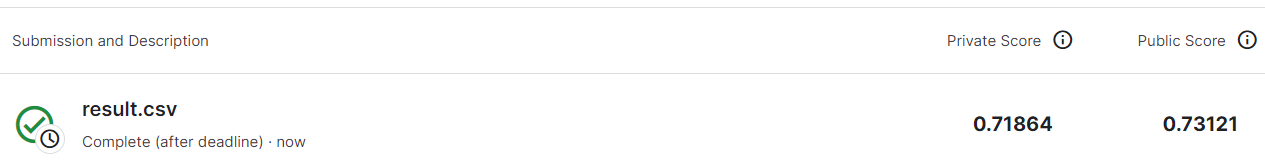